# Download Data from MongoDB and store it locally

In [1]:
from pymongo import MongoClient
from datetime import datetime 

In [127]:
collection_name = 'gst-all'
output_filename = 'data/massmedia-data/gst_date_indexed.pkl'

In [3]:
#Connect to media db
client = MongoClient('10.237.26.159', 27017, j=True)
db = client['media-db']
collection = db[collection_name]

In [4]:
collection.create_index("publishedDate")
docs = collection.find({},{'_id':0,'text':1,'publishedDate':1}).sort("publishedDate")
doc = []
for i in docs:
    doc.append(i)

In [5]:
# doc[1]
# datetime.strptime(doc[1]['publishedDate'],'%Y-%m-%d').weekday()

In [6]:
date_dict={}
for x in range(len(doc)):
    i = doc[x]
    date = datetime.strptime(i['publishedDate'],'%Y-%m-%d')
    weekday = date.weekday()
    if(weekday==0):
        date_dict[date]=x

In [9]:
import pickle
with open(output_filename,'wb') as f:
    pickle.dump((doc,date_dict),f)

In [130]:
with open(output_filename,'rb') as f:
    a,b=pickle.load(f)
a[1]['text']

"Two men, accused in crime cases, including attempt to murder, were detained under the Goondas Act on charges of threatening pavement vendors and petty merchants in Tambaram and for demanding mamool.'A release from Chennai Suburban Police Commissioner S.R. Jangid said that vendors' and traders' groups had complained that two men were intimidating and harassing pavement vendors in Tambaram. Several hundred vendors have pavement shops on Shanmugham Road, GST Road and also in a couple of other market areas. The Tambaram police picked up V. Chellapandi and S. Velu on charges of harassing the vendors. The two were also involved in an attempt to murder case in Perungalathur last month. After coming out from prison, they began to harass the vendors. They were detained under the Goondas Act."

# Generate Document Distribution

In [116]:
def load_data(classname):
    output_filename = 'data/massmedia-data/'+classname+'_date_indexed.pkl'
    with open(output_filename,'rb') as f:
        a,b=pickle.load(f)

    arr = []
    for i in b.values():
        arr.append(i)
        
    diff_arr=[]
    for i in range(1,len(arr)):
        diff_arr.append(arr[i]-arr[i-1])
    return diff_arr

In [125]:
b_gst = load_data('gst')
b_aadhar = load_data('aadhar')
b_farmers = load_data('farmers')
b_demon = load_data('demon')
max(len(b_gst),len(b_aadhar),len(b_demon),len(b_farmers))

446

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


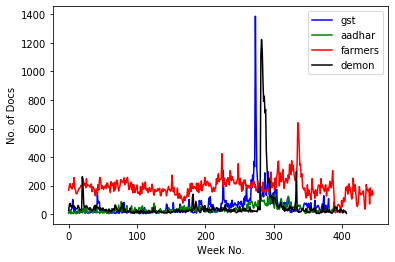

In [124]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.plot(b_gst[:446],color='b',label='gst')
plt.plot(b_aadhar[:446],color='g',label='aadhar')
plt.plot(b_farmers[:446],color='r',label='farmers')
plt.plot(b_demon[:446],color='k',label='demon')
plt.xlabel('Week No.')
plt.ylabel('No. of Docs')
plt.legend()
plt.savefig('combined_data.eps',format='eps')
plt.show()